In [307]:
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import SGDRegressor

import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [38]:
df = pd.read_csv('./data.csv')
print(df.shape)
df.head()

(1005, 8)


,name,year,price,rating,oil,actuator,transmission,engine_capacity
0,Toyota Wish,2015,1810000,9.1,бензин,передний,вариатор,1.8
1,Audi A6,2021,5550000,9.2,дизель,4WD,автомат,2.0
2,BMW 3-Series,2019,3590000,9.5,бензин,4WD,АКПП,2.0
3,Mercedes-Benz GLE Coupe,2015,4650000,9.4,бензин,4WD,АКПП,3.0
4,Ford Mondeo,2013,1150000,9.0,бензин,передний,робот,2.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1005 non-null   object 
 1   year             1005 non-null   int64  
 2   price            1005 non-null   int64  
 3   rating           423 non-null    float64
 4   oil              1005 non-null   object 
 5   actuator         1005 non-null   object 
 6   transmission     1005 non-null   object 
 7   engine_capacity  825 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 62.9+ KB


In [30]:
df.describe()

,year,price,rating,engine_capacity
count,1005.000000,1.005000e+03,423.00000,825.000000
mean,2018.472637,2.817772e+06,8.84279,1.833939
std,6.193952,2.347808e+06,0.48238,0.546202
min,1991.000000,5.000000e+04,7.40000,0.700000
25%,2015.000000,1.549000e+06,8.60000,1.500000
50%,2022.000000,2.479900e+06,9.00000,1.600000
75%,2023.000000,3.559900e+06,9.20000,2.000000
max,2023.000000,2.339900e+07,9.60000,6.800000


array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'engine_capacity'}>]], dtype=object)

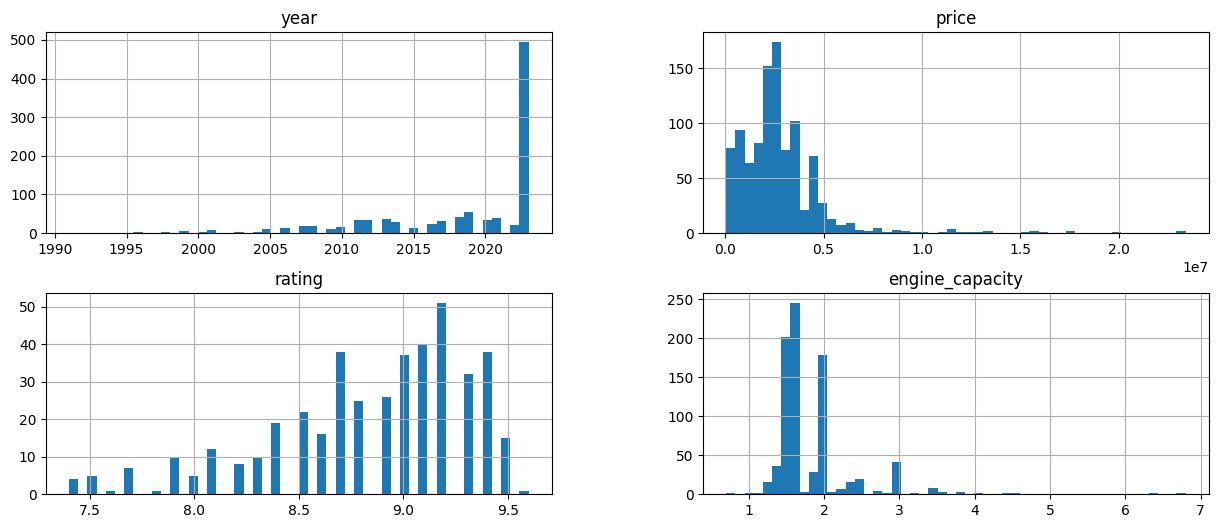

In [31]:
df.hist(bins=50, figsize=(15, 6))

In [32]:
print(df.transmission.value_counts())
print(df.actuator.value_counts())
df.oil.value_counts()

transmission
АКПП        285
робот       280
вариатор    225
механика    165
автомат      47
передний      2
4WD           1
Name: count, dtype: int64
actuator
передни     328
передний    324
4WD         177
4W          155
задний       18
211 к         1
56 960 к      1
81 533 к      1
Name: count, dtype: int64


oil
бензин      915
дизель       78
гибрид        6
электро       3
механика      2
автомат       1
Name: count, dtype: int64

## ПредОбработка данных

In [178]:
dfO = df.drop_duplicates()

dfO = dfO.assign(
    year=dfO.year.max() - dfO.year,
)


cols = [
    # "name",
    "year",
    "price",
    "rating",
    "oil",
    # "actuator",
    "transmission",
    "engine_capacity",
]

dfO = dfO[cols]

dfO = dfO[dfO.oil != "автомат"]
dfO = dfO[dfO.oil != "механика"]

dfO = dfO[dfO.engine_capacity.notnull()]
dfO = dfO[dfO.rating.notnull()]

# dfO = dfO[np.isfinite(dfO).all(1)]
# dfO.replace([np.inf, -np.inf], np.nan)
# dfO.dropna()

dfO = pd.get_dummies(dfO)

# dfO.head(500)
dfO.info()

<class 'pandas.core.frame.DataFrame'>
Index: 409 entries, 0 to 898
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   409 non-null    int64  
 1   price                  409 non-null    int64  
 2   rating                 409 non-null    float64
 3   engine_capacity        409 non-null    float64
 4   oil_бензин             409 non-null    bool   
 5   oil_дизель             409 non-null    bool   
 6   transmission_АКПП      409 non-null    bool   
 7   transmission_автомат   409 non-null    bool   
 8   transmission_вариатор  409 non-null    bool   
 9   transmission_механика  409 non-null    bool   
 10  transmission_робот     409 non-null    bool   
dtypes: bool(7), float64(2), int64(2)
memory usage: 18.8 KB


## Train

In [190]:
train, tests= train_test_split(dfO, test_size=0.2)
val, test = train_test_split(tests, test_size=0.5)
print(len(train), len(val), len(test))

target_col = 'price'
train_x, train_y = train.drop(target_col, axis=1), train[target_col]
val_x, val_y = test.drop(target_col, axis=1), val[target_col]
test_x, test_y = test.drop(target_col, axis=1), test[target_col]

model = LinearRegression()
model.fit(train_x, train_y)

pred = model.predict(test_x)

mean_absolute_percentage_error(test_y, pred)

327 41 41


2.9809860547220044

## KNeighbors

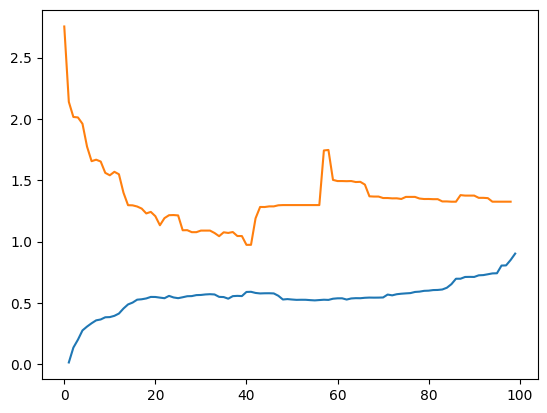

In [244]:
def predict_train(neighbors: int) :
    model = KNeighborsClassifier(n_neighbors= neighbors)
    model.fit(train_x, train_y)

    predicted = model.predict(train_x)
    mape = mean_absolute_percentage_error(train_y, predicted)
    return (mape, model)

def predict_val(neighbors: int) :
    model = KNeighborsClassifier(n_neighbors= neighbors)
    model.fit(train_x, train_y)

    predicted = model.predict(val_x)
    mape = mean_absolute_percentage_error(val_y, predicted)
    return (mape, model)

def predict_test(neighbors: int) :
    model = KNeighborsClassifier(n_neighbors= neighbors)
    model.fit(train_x, train_y)

    predicted = model.predict(test_x)
    mape = mean_absolute_percentage_error(test_y, predicted)
    return (mape, model)

param = [neighbors for neighbors in range(1, 100)]

min_score = None
best_model = None
list_mape_train = []
list_mape_val = []
for neighbors in param:

    (mape_train, model_train) = predict_train(neighbors)
    list_mape_train.append(mape_train)

    #--- val: find best model
    (mape_val, model_val) = predict_val(neighbors)
    list_mape_val.append(mape_val)
    if min_score is None or min_score >= mape_val:
        min_score = mape_val
        best_model = model_val
    #---
        
        
plt.plot(param, list_mape_train, list_mape_val)
plt.show()

In [246]:
print(min_score, best_model)

(mape_test, model_test) = predict_test(best_model.n_neighbors)
print(mape_test, model_test)

0.9734880982041592 KNeighborsClassifier(n_neighbors=42)
0.7421797359965503 KNeighborsClassifier(n_neighbors=42)


## Linear

/Users/grigorii/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


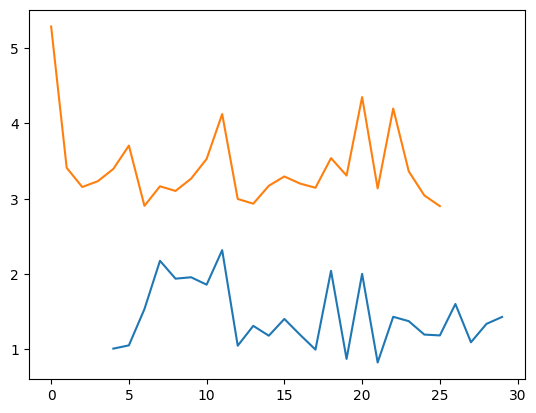

In [256]:
def linear_predict_train(iter: int) :
    model = SGDRegressor(max_iter=iter)
    model.fit(train_x, train_y)

    predicted = model.predict(train_x)
    mape = mean_absolute_percentage_error(train_y, predicted)
    return (mape, model)

def linear_predict_val(iter: int) :
    model = SGDRegressor(max_iter=iter)
    model.fit(train_x, train_y)

    predicted = model.predict(val_x)
    mape = mean_absolute_percentage_error(val_y, predicted)
    return (mape, model)

def linear_predict_test(iter: int) :
    model = SGDRegressor(max_iter=iter)
    model.fit(train_x, train_y)

    predicted = model.predict(test_x)
    mape = mean_absolute_percentage_error(test_y, predicted)
    return (mape, model)

param = [iter for iter in range(4, 30)]

linear_min_score = None
linear_best_model = None
linear_list_mape_train = []
linear_list_mape_val = []
for iter in param:

    (mape_train, model_train) = linear_predict_train(2**iter)
    linear_list_mape_train.append(mape_train)

    #--- val: find best model
    (mape_val, model_val) = linear_predict_val(2**iter)
    linear_list_mape_val.append(mape_val)
    if linear_min_score is None or linear_min_score >= mape_val:
        linear_min_score = mape_val
        linear_best_model = model_val
    #---
        
        
plt.plot(param, linear_list_mape_train, linear_list_mape_val)
plt.show()

In [290]:
print(linear_min_score, linear_best_model)

(linear_mape_test, linear_model_test) = linear_predict_test(linear_best_model.max_iter)
print(linear_mape_test, linear_model_test)

2.9019239948198434 SGDRegressor(max_iter=536870912)
3.4605682763659984 SGDRegressor(max_iter=536870912)


## Деревья

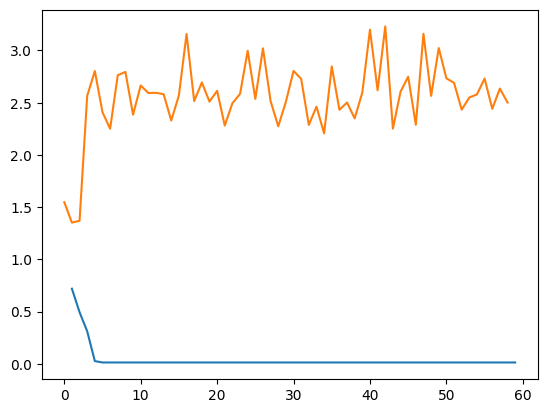

In [274]:
def tree_predict_train(depth: int) :
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(train_x, train_y)

    predicted = model.predict(train_x)
    mape = mean_absolute_percentage_error(train_y, predicted)
    return (mape, model)

def tree_predict_val(depth: int) :
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(train_x, train_y)

    predicted = model.predict(val_x)
    mape = mean_absolute_percentage_error(val_y, predicted)
    return (mape, model)

def tree_predict_test(depth: int) :
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(train_x, train_y)

    predicted = model.predict(test_x)
    mape = mean_absolute_percentage_error(test_y, predicted)
    return (mape, model)

param = [depth for depth in range(1, 60)]

tree_min_score = None
tree_best_model = None
tree_list_mape_train = []
tree_list_mape_val = []
for depth in param:

    (mape_train, model_train) = tree_predict_train(2**depth)
    tree_list_mape_train.append(mape_train)

    #--- val: find best model
    (mape_val, model_val) = tree_predict_val(2**depth)
    tree_list_mape_val.append(mape_val)
    if tree_min_score is None or tree_min_score >= mape_val:
        tree_min_score = mape_val
        tree_best_model = model_val
    #---
        
        
plt.plot(param, tree_list_mape_train, tree_list_mape_val)
plt.show()

In [305]:
print(tree_min_score, tree_best_model)

(tree_mape_test, tree_model_test) = tree_predict_test(tree_best_model.max_depth)
print(tree_mape_test, tree_model_test)

1.351801567529405 DecisionTreeClassifier(max_depth=4)
0.6870126401874224 DecisionTreeClassifier(max_depth=4)


## Ensemble

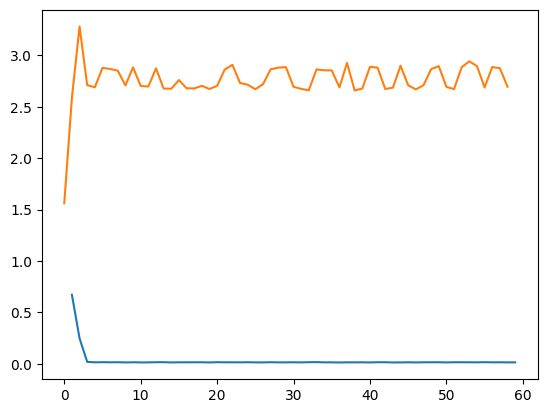

In [308]:
def ensemble_predict_train(depth: int) :
    model = RandomForestClassifier(max_depth=depth)
    model.fit(train_x, train_y)

    predicted = model.predict(train_x)
    mape = mean_absolute_percentage_error(train_y, predicted)
    return (mape, model)

def ensemble_predict_val(depth: int) :
    model = RandomForestClassifier(max_depth=depth)
    model.fit(train_x, train_y)

    predicted = model.predict(val_x)
    mape = mean_absolute_percentage_error(val_y, predicted)
    return (mape, model)

def ensemble_predict_test(depth: int) :
    model = RandomForestClassifier(max_depth=depth)
    model.fit(train_x, train_y)

    predicted = model.predict(test_x)
    mape = mean_absolute_percentage_error(test_y, predicted)
    return (mape, model)

param = [depth for depth in range(1, 60)]

ensemble_min_score = None
ensemble_best_model = None
ensemble_list_mape_train = []
ensemble_list_mape_val = []
for depth in param:

    (mape_train, model_train) = ensemble_predict_train(2**depth)
    ensemble_list_mape_train.append(mape_train)

    #--- val: find best model
    (mape_val, model_val) = ensemble_predict_val(2**depth)
    ensemble_list_mape_val.append(mape_val)
    if ensemble_min_score is None or ensemble_min_score >= mape_val:
        ensemble_min_score = mape_val
        ensemble_best_model = model_val
    #---
        
        
plt.plot(param, ensemble_list_mape_train, ensemble_list_mape_val)
plt.show()

In [313]:
print(ensemble_min_score, ensemble_best_model)

(ensemble_mape_test, ensemble_model_test) = ensemble_predict_test(ensemble_best_model.max_depth)
print(ensemble_mape_test, ensemble_model_test)

1.5605955847954005 RandomForestClassifier(max_depth=2)
1.1916923032770361 RandomForestClassifier(max_depth=2)
